In [260]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import matplotlib.pyplot as plt

In [261]:
data = [35492, 45298, 46087, 36707, 52290, 66464, 77187, 64262, 70727, 118820, 131687, 135180]

In [262]:
data = [38199, 41711, 41785, 38269, 47993, 59617, 70611, 60436, 84133, 129021, 142913, 140987]

In [263]:
data = [605, 772, 849, 1075, 1237, 1386, 1597, 1610, 1826, 2471, 3145, 3552]

In [264]:
data = [2325, 2654, 2376, 1843, 1924, 2662, 4430, 1895, 1193, 2001, 2674, 1688]

In [265]:
data = [257, 210, 280, 455, 401, 730, 1044, 1499, 1241, 1749, 1927, 2462]

In [266]:
ideal_data = [(i)**2 for i in range(1, 13)]

In [267]:
# Normalize the data

def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

data_normalized = normalize(np.array(data))
ideal_data_normalized = normalize(np.array(ideal_data))


DTW Distance: 0.4617030394117428


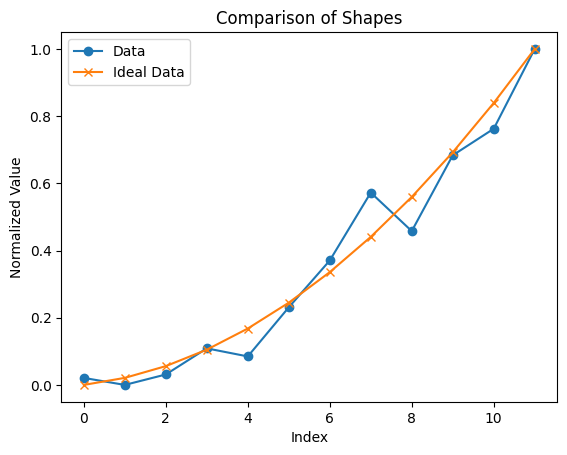

In [268]:
# Reshape data to 2-D arrays
data_normalized_2d = data_normalized.reshape(-1, 1)
ideal_data_normalized_2d = ideal_data_normalized.reshape(-1, 1)

# Calculate DTW distance
distance, path = fastdtw(data_normalized_2d, ideal_data_normalized_2d, dist=euclidean)

print(f"DTW Distance: {distance}")

# Plot the normalized data
plt.plot(data_normalized, label='Data', marker='o')
plt.plot(ideal_data_normalized, label='Ideal Data', marker='x')
plt.xlabel('Index')
plt.ylabel('Normalized Value')
plt.title('Comparison of Shapes')
plt.legend()
plt.show()

In [269]:
correlation = np.corrcoef(data_normalized, ideal_data_normalized)[0, 1]

In [270]:
# For a simple approach, use the Euclidean distance between points
from scipy.spatial.distance import cdist

def shape_similarity(data1, data2):
    distances = cdist(np.array(data1).reshape(-1, 1), np.array(data2).reshape(-1, 1), metric='euclidean')
    return np.mean(np.min(distances, axis=0)) + np.mean(np.min(distances, axis=1))

similarity = shape_similarity(data_normalized, ideal_data_normalized)


In [271]:
similarity

0.037018118057194425

In [272]:
def dtw_rating(distance, max_distance):
    return max(0, 10 - (distance / max_distance * 10))

# Assume max_distance is a known or predefined value
max_dtw_distance = 1.0  # Example value
dtw_rating_value = dtw_rating(distance, max_dtw_distance)


In [273]:
correlation_rating = (correlation + 1) / 2 * 10 # Maps -1 to 1 range to 0 to 10 scale

correlation_rating_rounded = round(correlation_rating)



In [274]:
correlation_rating_rounded

10